<a href="https://colab.research.google.com/github/sureshgv/machine-learning-tutorials/blob/main/CRISP_DM_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Understand CRIP-DM using a simple dataset


In [ ]:
# Business understanding
# Given a set of salaries find out, salary of a person using their year experience


In [3]:
# Load the data
import pandas as pd

df = pd.read_csv("./sample_data/Salary_Data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


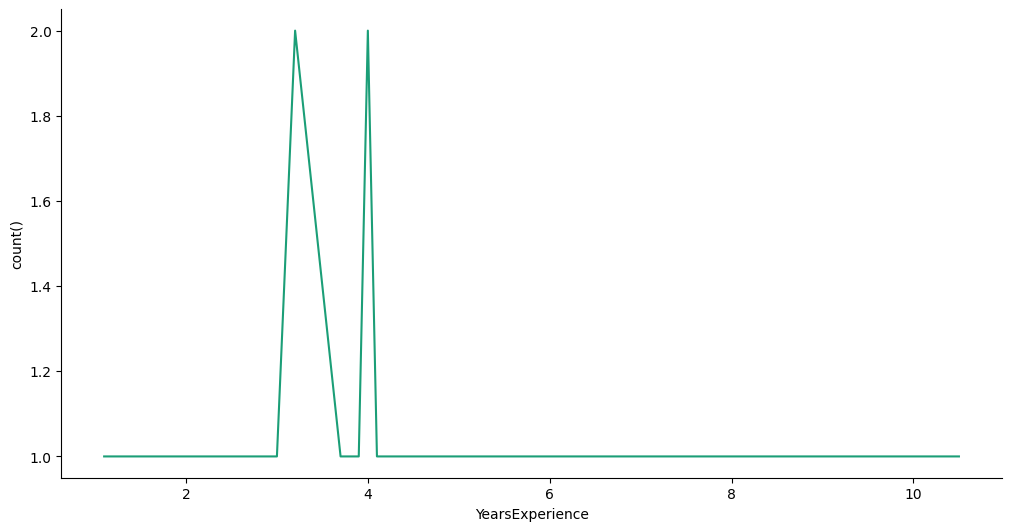

In [11]:
# @title YearsExperience vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['YearsExperience']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'YearsExperience'}, axis=1)
              .sort_values('YearsExperience', ascending=True))
  xs = counted['YearsExperience']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('YearsExperience', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YearsExperience')
_ = plt.ylabel('count()')

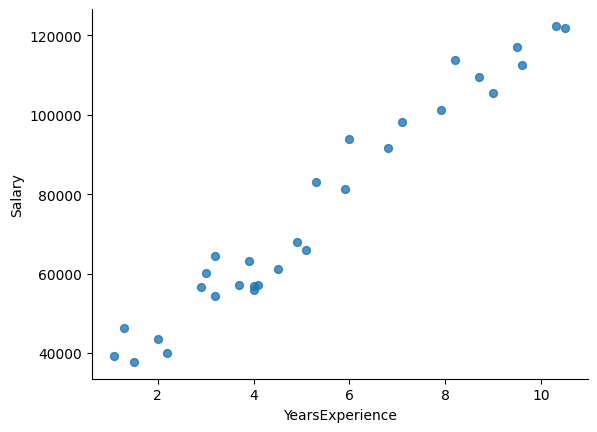

In [10]:
# @title YearsExperience vs Salary

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
# If a skew is between -0.5 to 0.5 == we consider it as good skew
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [15]:
import plotly.express as px

fig3 = px.bar(df,x="YearsExperience" , y="Salary")
fig3.show()

In [18]:
fig4 = px.histogram(df,x="YearsExperience" , y="Salary",color_discrete_sequence = px.colors.qualitative.Set1 )
fig4.show()

In [28]:
fig = px.box(df , x="Salary")
fig

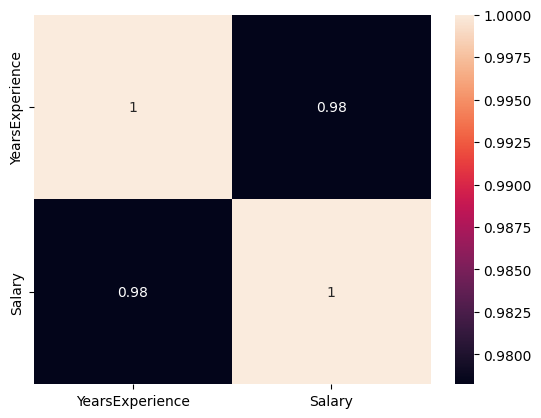

In [29]:
# Use heatmap for strong correlation between parameters. Here YearsOfExperience and Salary has strong correlation.
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()

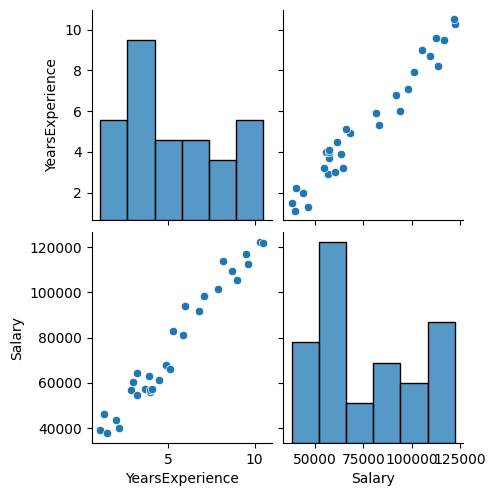

In [30]:
sns.pairplot(df)
plt.show()

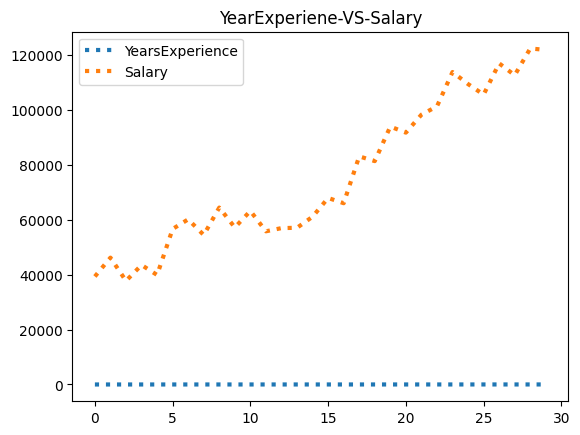

In [33]:
df.plot.line(linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

In [ ]:
# Modeling
# We need to findout Salary for a given number of years of experience

In [35]:
X = df.drop('Salary', axis=1)
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [36]:
y = df.Salary
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [ ]:
# What is linear regression?
# y = B0 + B1*x


In [37]:
# Train and Split the data
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [39]:
print(X_train.shape)

(21, 1)


In [40]:
X_test.shape

(9, 1)

In [41]:
# Model fitting
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [42]:
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
#B0
lr.intercept_

26777.391341197625

In [45]:
#B1
lr.coef_

array([9360.26128619])

In [47]:
# Prediction
y_pred=lr.predict(X_test)

In [48]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [49]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
27    112635
11     55794
17     83088
Name: Salary, dtype: int64

In [50]:
# Evaluation of the model
from sklearn import metrics

In [51]:
r2=metrics.r2_score(y_test,y_pred)

In [52]:
r2

0.9740993407213511

In [55]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4834.260936361728


In [67]:
# Example
print(lr.predict([[27.5]]))

[284184.57671152]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

